In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in your dataset
df = pd.read_csv(r"C:\Dev\GIT\DataScience_Bootcamp\Week8\customers.csv")

# Basic information about the dataset
print("DataFrame Info:")
df.info()

print("\nDataFrame Head:")
print(df.head())

print("\nStatistical Summary:")
print(df.describe(include='all'))


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB

DataFrame Head:
       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996 

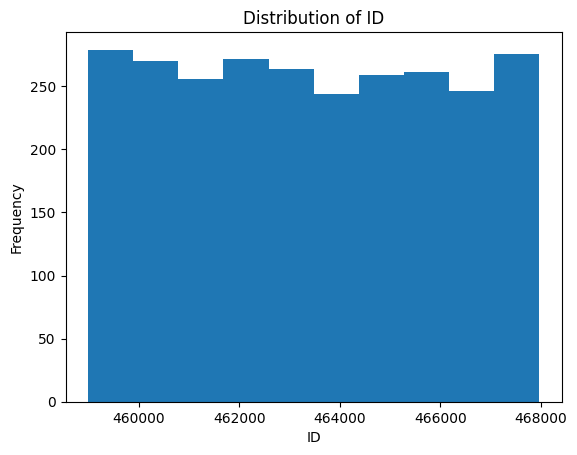

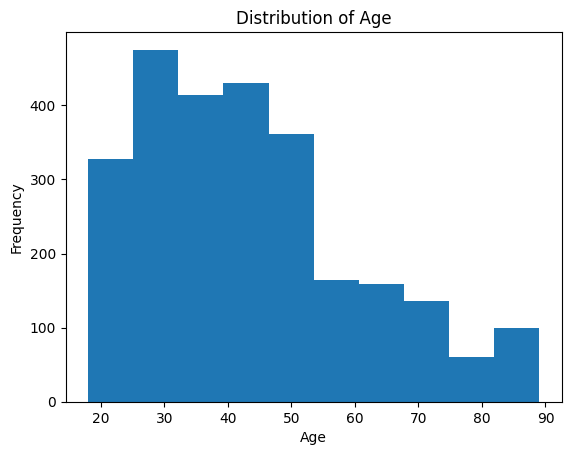

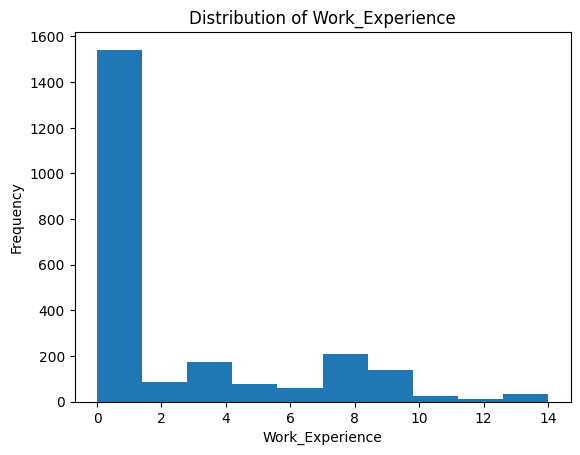

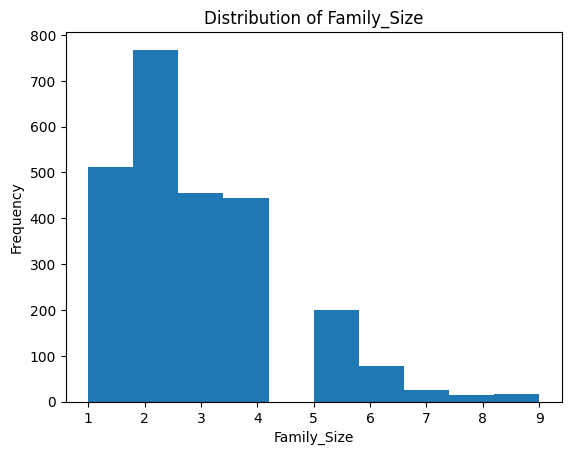

In [15]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    plt.figure()
    plt.hist(df[col].dropna())  # Drop NA for visualization
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [16]:
# Count missing values in each column
print("Missing values:\n", df.isna().sum())

# Example: drop rows with any missing values (simple approach)
df.dropna(inplace=True)


Missing values:
 ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64


In [17]:
cat_cols = df.select_dtypes(include=['object','category']).columns

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [19]:
from sklearn.cluster import KMeans

# Decide how many clusters to try. This is application-specific.
k = 3  # as an example

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)

# Cluster assignments for each data point
labels = kmeans.labels_


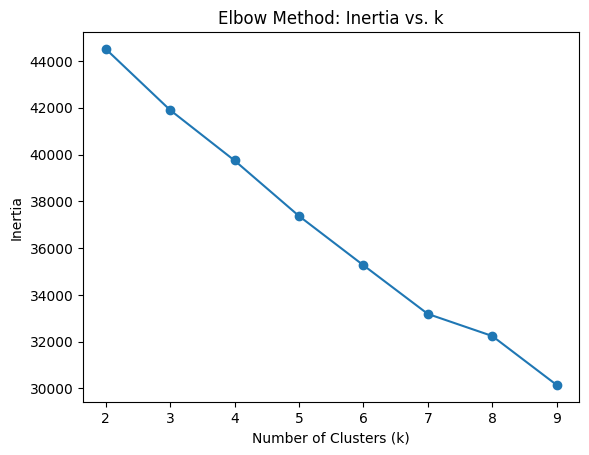

In [20]:
inertias = []
K_values = range(2, 10)  # for example, try k=2..9

for k_val in K_values:
    km = KMeans(n_clusters=k_val, random_state=42)
    km.fit(df_scaled)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(K_values, inertias, marker='o')
plt.title("Elbow Method: Inertia vs. k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [21]:
from sklearn.metrics import silhouette_score

# Evaluate the clustering with silhouette
sil_score = silhouette_score(df_scaled, labels)
print(f"Silhouette Score for k={k}: {sil_score:.3f}")


Silhouette Score for k=3: 0.119
